In [1]:
from Precode import *
import numpy

data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S1('9330') # please replace 0111 with your last four digit of your ID

Strategy 1: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

3
[[5.07631894 3.30296197]
 [1.87131855 3.43365823]
 [5.02471033 8.23879873]]
5
[[6.2396717  6.55049457]
 [6.46350009 0.77471754]
 [7.83816267 2.49139275]
 [7.06572    2.08940967]
 [6.63352332 0.98020705]]


In [4]:
def distance(d1, d2):
    return numpy.sqrt(numpy.sum(numpy.square(d1 - d2), axis = 1)).reshape(d1.shape[0],1)
    
def k_means(data, k, centroids):
    prev_obj = 10000000000
    centroid_coords = dict()
    all_distances = dict()
    #create centroids
    objective_score = 1000000000
    epoch = 0
    while epoch < 500:
        prev_obj = objective_score
        for i in range(k):
            centroid_coords[i] = centroids[i]
            #calculate all distances of data to each centroid
            all_distances[i] = distance(data, centroid_coords[i])
        
        #get euclidean distance scores
        distance_scores = numpy.concatenate([value for key,value in all_distances.items()], axis = 1)
        #find clusters for each point
        distance_scores = numpy.argmin(distance_scores, axis = 1)
    
        #calculate means
        means = dict()
        for x in range(k):
            means[x] = numpy.mean(data[distance_scores == x][:], axis = 0)
    
        #calculate objective function
        objective_score = numpy.sum([numpy.sum(numpy.square(distance(data[distance_scores == key][:], means[key]))) for key, value in means.items()])
        #update centroids
        centroids = means
        epoch += 1
    
    return objective_score, centroids

print(k_means(data, k1, i_point1))
print(k_means(data, k2, i_point2))



(1338.1059838029255, {0: array([7.23975119, 2.48208269]), 1: array([3.24896423, 2.58027691]), 2: array([4.83375318, 7.31605824])})
(598.5546443663115, {0: array([6.7786424 , 8.07967641]), 1: array([2.68198633, 2.09461587]), 2: array([7.55616782, 2.23516796]), 3: array([2.87490813, 7.01082281]), 4: array([5.22321274, 4.22502829])})


In [5]:
k_values = [i for i in range(2,11)]
centroids_for_k = dict()
k_scores = dict()
for k in k_values:
    idx = np.random.randint(len(data), size=k)
    print(idx)
    centroids_for_k[k] = data[idx, :]
    objective_score, centroids = k_means(data, k, centroids_for_k[k])
    k_scores[k] = objective_score

print(k_scores)
print(centroids_for_k)

[ 41 163]
[124 174  15]
[130 297  15  87]
[ 37 175 134 283  30]
[141  16 282 273  61 117]
[256 235 110 188 201 270 176]
[183  49  37  71 143 130  82 257]
[228  60 248 135  57  82 145  14 198]
[ 27  74 258  38  80  56  84  68  29  19]
{2: 1921.033485856206, 3: 1338.1076016520997, 4: 789.237972217795, 5: 613.2824392056041, 6: 468.9538755370989, 7: 390.0265587927033, 8: 385.89678446447545, 9: 292.4082044599104, 10: 182.72607076337144}
{2: array([[3.2115245 , 1.1089788 ],
       [5.60944242, 2.91327032]]), 3: array([[7.80003043, 1.90963115],
       [7.90345455, 2.28430161],
       [6.6384501 , 8.33574252]]), 4: array([[6.48423011, 5.04416608],
       [4.32239695, 0.33088885],
       [6.6384501 , 8.33574252],
       [2.33338702, 7.23913284]]), 5: array([[5.27137631, 5.53516715],
       [3.54461267, 0.94261882],
       [7.72715541, 7.62018213],
       [7.75261716, 8.67289362],
       [6.47098788, 5.4510163 ]]), 6: array([[4.62125558, 7.81235824],
       [6.6781262 , 1.1080157 ],
       [1.77

In [6]:
import matplotlib.pyplot as plt

Text(0,0.5,'Objective function')

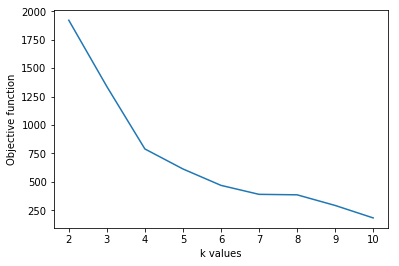

In [7]:
plt.plot([key for key,value in k_scores.items()], [value for key,value in k_scores.items()])
plt.xlabel('k values')
plt.ylabel('Objective function')